In [239]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [240]:
loan_data = pd.read_csv("dataset.csv", encoding= 'unicode_escape')

In [241]:
#loan_data

In [242]:
loan_data = loan_data.drop(['id'], axis=1)
loan_data = loan_data.drop(['member_id'], axis=1)

In [243]:
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,...,0.00,0.0,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,...,19.86,0.0,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,...,19.57,0.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,...,10.80,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,...,3.60,0.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,...,22.17,0.0,12.0,0.0,16550.0,73.50%,22.0,3586.619764,3586.62,0
38476,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,...,11.57,0.0,21.0,0.0,16898.0,39.70%,33.0,12703.534030,12703.53,0
38477,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,...,10.63,0.0,9.0,1.0,10386.0,62.20%,25.0,14202.267530,14163.31,0
38478,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,...,18.97,0.0,8.0,0.0,7301.0,53.30%,12.0,12815.178320,12815.18,0


In [244]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,repay_fail
count,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,38479.000000,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38480.000000
mean,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,0.151927,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,0.151481
std,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,0.507592,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,0.358522
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
25%,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,0.000000,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,0.000000
50%,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,0.000000,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,0.000000,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,0.000000
max,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,11.000000,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,1.000000


In [245]:
# loan_data.hist(bins=10, figsize=(10,8))
# plt.show()

In [246]:
loan_data.dtypes

loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util              object
total_acc              float64
total_pymnt            float64
total_pymnt_inv        float64
repay_fail               int64
dtype: object

In [247]:
loan_data.isnull().sum()

loan_amnt                1
funded_amnt              1
funded_amnt_inv          1
term                     0
int_rate                 0
installment              1
emp_length             993
home_ownership           0
annual_inc               2
verification_status      0
purpose                  0
dti                      0
delinq_2yrs              1
open_acc                 1
pub_rec                  1
revol_bal                4
revol_util              59
total_acc                1
total_pymnt              1
total_pymnt_inv          1
repay_fail               0
dtype: int64

In [248]:
loan_data = loan_data.dropna()

In [249]:
loan_data.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
repay_fail             0
dtype: int64

In [250]:
loan_data.drop_duplicates(inplace=True)
loan_data

C:\Users\hp\AppData\Local\Temp\ipykernel_3068\3106954416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.drop_duplicates(inplace=True)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,repay_fail
0,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,...,0.00,0.0,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,1
1,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,...,19.86,0.0,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,0
2,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,...,19.57,0.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1
3,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,...,10.80,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,0
4,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,...,3.60,0.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,RENT,74250.0,Verified,...,22.17,0.0,12.0,0.0,16550.0,73.50%,22.0,3586.619764,3586.62,0
38476,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,RENT,62000.0,Source Verified,...,11.57,0.0,21.0,0.0,16898.0,39.70%,33.0,12703.534030,12703.53,0
38477,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,...,10.63,0.0,9.0,1.0,10386.0,62.20%,25.0,14202.267530,14163.31,0
38478,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,...,18.97,0.0,8.0,0.0,7301.0,53.30%,12.0,12815.178320,12815.18,0


In [251]:
#Find out the unique values of columns to encode the data

loan_data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [252]:
loan_data.emp_length.unique()

array(['< 1 year', '4 years', '10+ years', '3 years', '5 years',
       '7 years', '2 years', '1 year', '6 years', '9 years', '8 years'],
      dtype=object)

In [253]:
loan_data.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [254]:
#Convert term into numerical format

term_numerical = {'36 months': 36, '60 months': 60}
loan_data['term'] = loan_data['term'].map(term_numerical)

C:\Users\hp\AppData\Local\Temp\ipykernel_3068\2406814945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['term'] = loan_data['term'].map(term_numerical)


<Axes: xlabel='home_ownership', ylabel='count'>

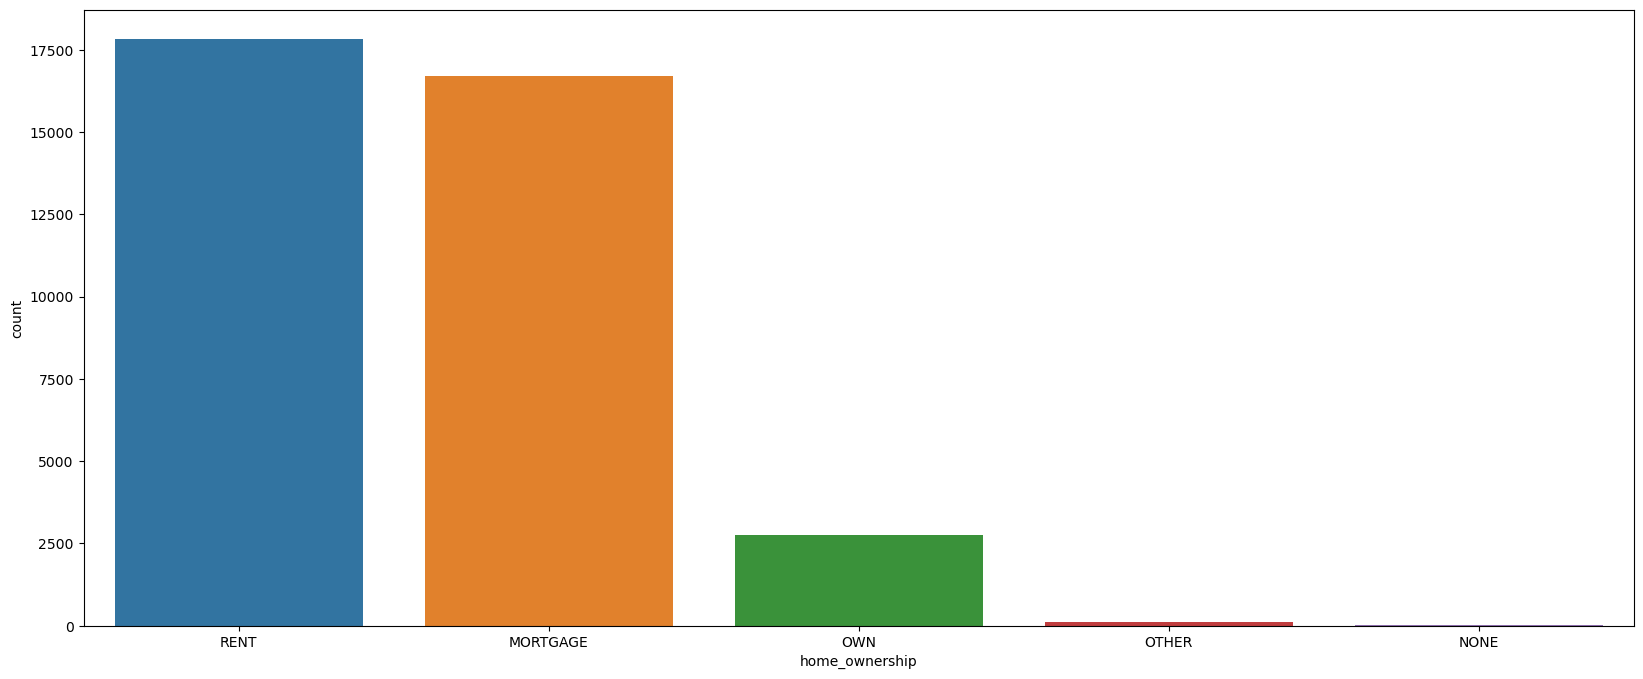

In [256]:
#EDA
plt.figure(figsize=(20,8))

sns.countplot(loan_data, x='home_ownership')

<Axes: xlabel='emp_length', ylabel='count'>

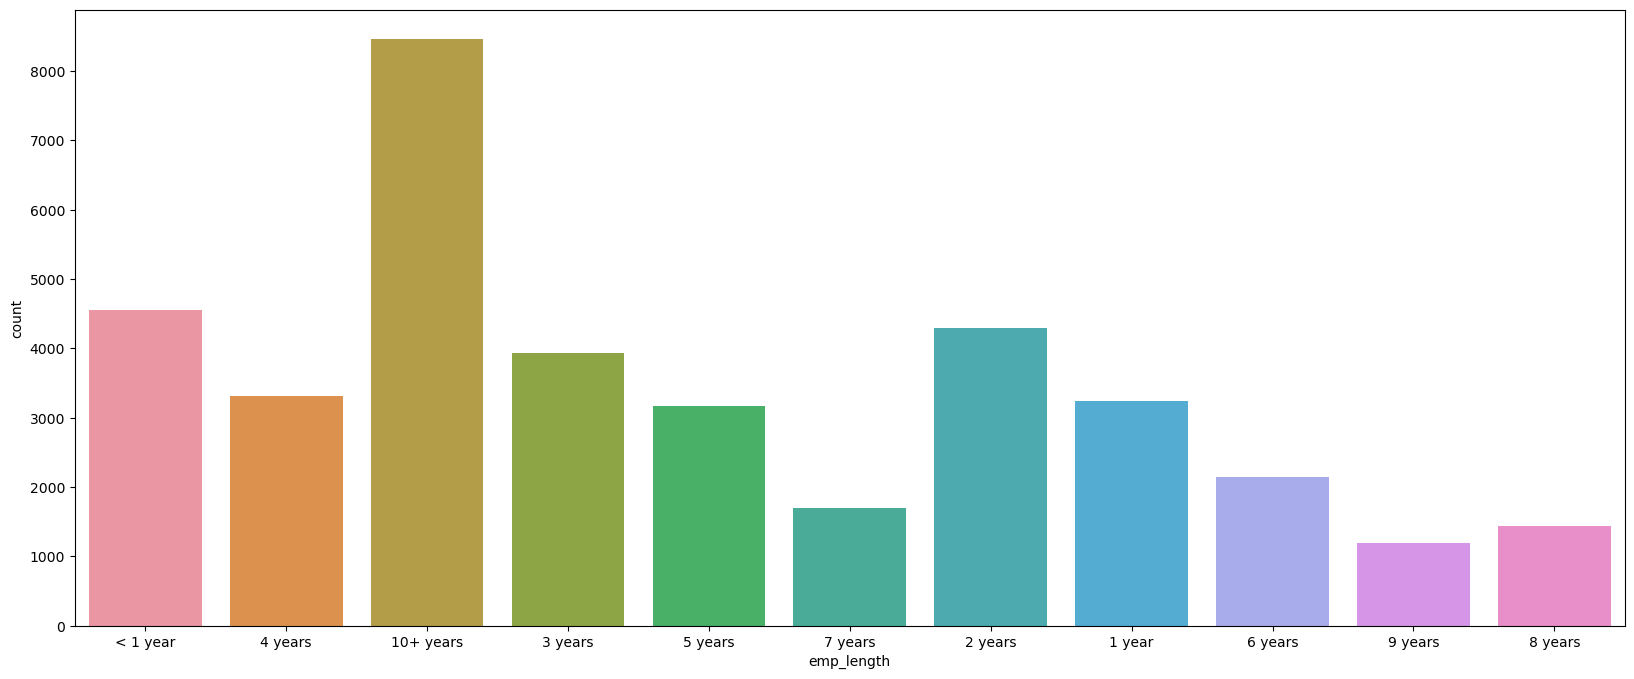

In [257]:
#EDA
plt.figure(figsize=(20,8))

sns.countplot(loan_data, x='emp_length')

<Axes: xlabel='verification_status', ylabel='count'>

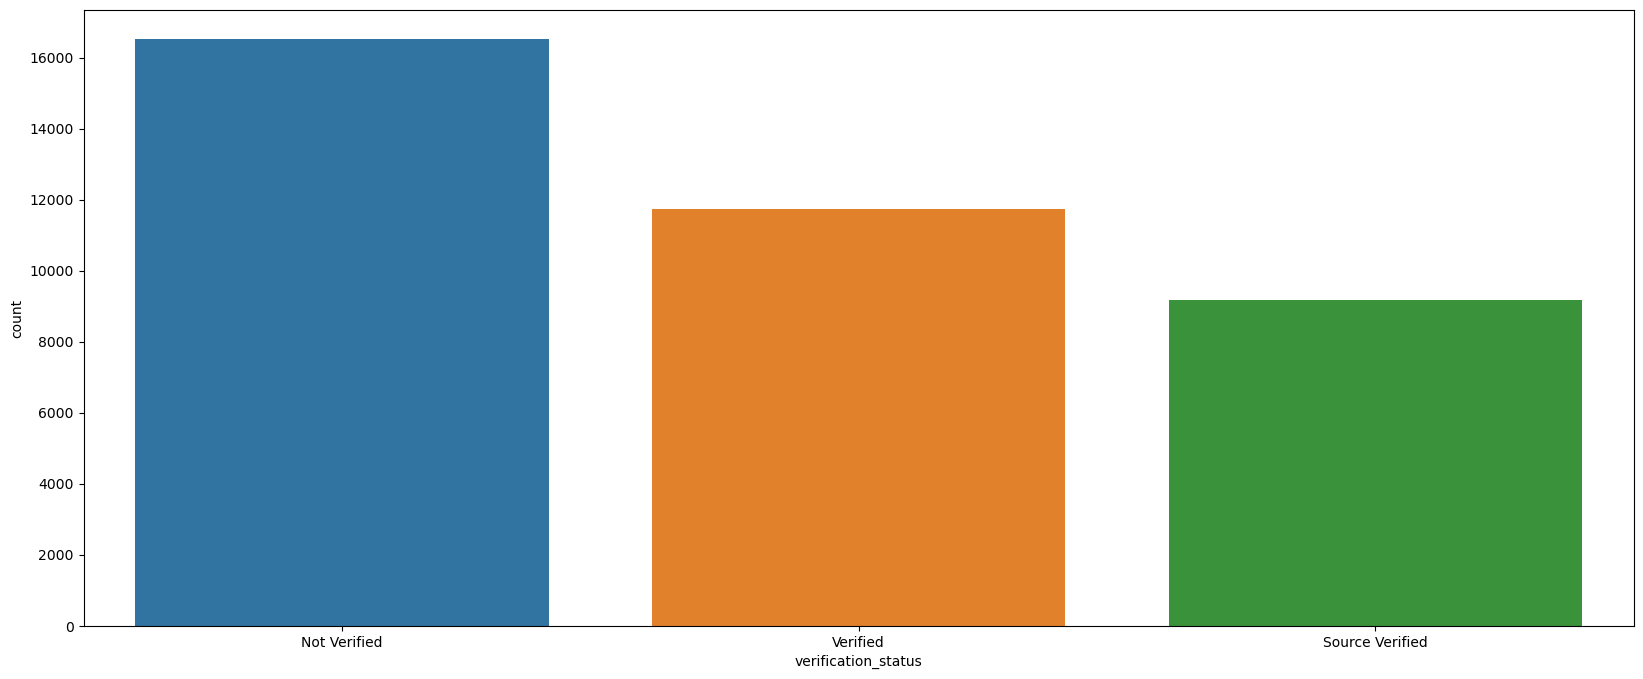

In [258]:
plt.figure(figsize=(20,8))

sns.countplot(loan_data, x='verification_status')

<Axes: xlabel='purpose', ylabel='count'>

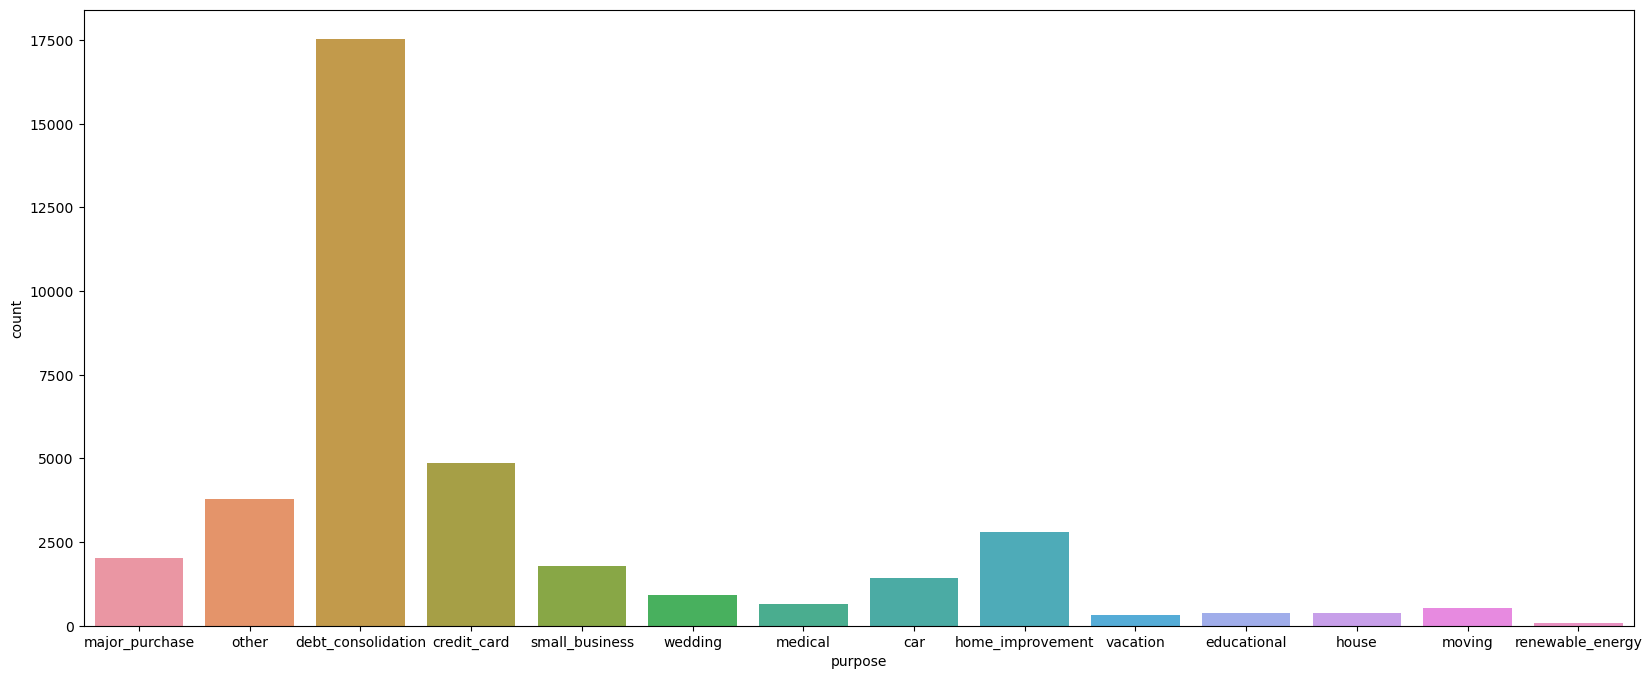

In [259]:
plt.figure(figsize=(20,8))

sns.countplot(loan_data, x='purpose')

In [260]:
#Label encoding for data
encoder = preprocessing.LabelEncoder()
loan_data['emp_length'] = encoder.fit_transform(loan_data['emp_length'])
loan_data['home_ownership'] = encoder.fit_transform(loan_data['home_ownership'])
loan_data['verification_status'] = encoder.fit_transform(loan_data['verification_status'])
loan_data['purpose'] = encoder.fit_transform(loan_data['purpose'])
loan_data['revol_util'] = encoder.fit_transform(loan_data['revol_util'])
#loan_data

C:\Users\hp\AppData\Local\Temp\ipykernel_3068\3242549483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['emp_length'] = encoder.fit_transform(loan_data['emp_length'])
C:\Users\hp\AppData\Local\Temp\ipykernel_3068\3242549483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['home_ownership'] = encoder.fit_transform(loan_data['home_ownership'])
C:\Users\hp\AppData\Local\Temp\ipykernel_3068\3242549483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [262]:
loan_data.dtypes

loan_amnt              float64
funded_amnt            float64
funded_amnt_inv        float64
term                     int64
int_rate               float64
installment            float64
emp_length               int32
home_ownership           int32
annual_inc             float64
verification_status      int32
purpose                  int32
dti                    float64
delinq_2yrs            float64
open_acc               float64
pub_rec                float64
revol_bal              float64
revol_util               int32
total_acc              float64
total_pymnt            float64
total_pymnt_inv        float64
repay_fail               int64
dtype: object

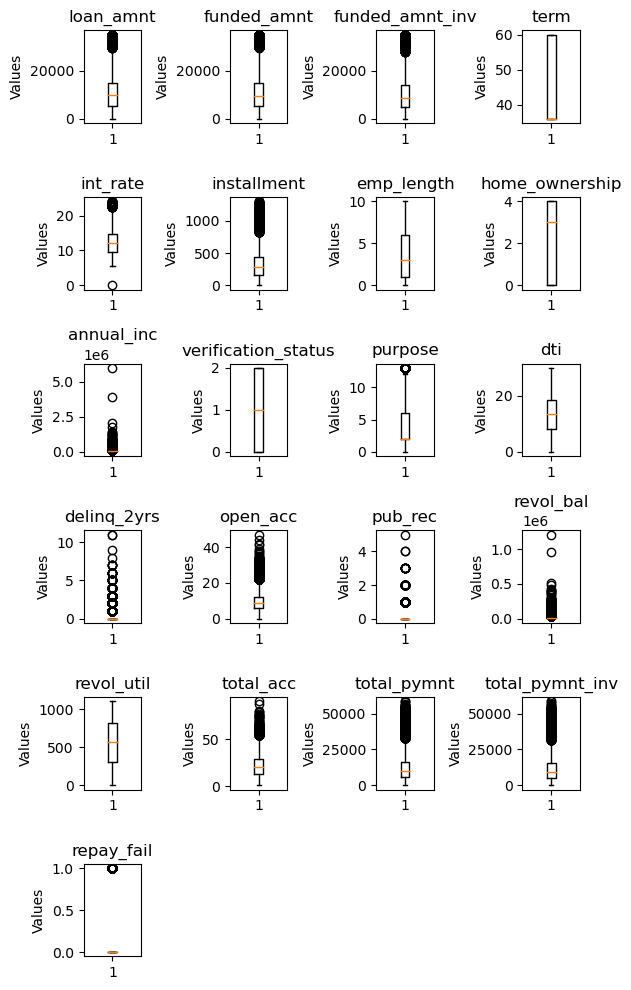

In [263]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the number of columns for the subplots grid
num_cols = 4

# Calculate the number of rows needed based on the number of columns
num_rows = (len(loan_data.columns) + num_cols - 1) // num_cols

figsize_new = (6, 10)

# Create subplots
#fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize_new)

# Flatten the axes array if it's not already flat
if num_rows == 1:
    axes = [axes]

# Create box plots for each column
for i, column_name in enumerate(loan_data.columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index][col_index]

    ax.boxplot(loan_data[column_name])
    ax.set_title(column_name)
    ax.set_ylabel('Values')

# Remove any empty subplots
for i in range(len(loan_data.columns), num_rows * num_cols):
    row_index = i // num_cols
    col_index = i % num_cols
    fig.delaxes(axes[row_index][col_index])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [264]:
#Remove Outliers

import pandas as pd

def remove_outliers_for_columns(df, column_names, threshold=1.5):
    
    # Create a copy of the original DataFrame to preserve the original data
    df_no_outliers = df.copy()

    for column_name in column_names:
        # Calculate Q1 and Q3 for the column
        Q1 = df_no_outliers[column_name].quantile(0.25)
        Q3 = df_no_outliers[column_name].quantile(0.75)

        # Calculate the IQR for the column
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Replace data in the new DataFrame with data within the bounds for the current column
        df_no_outliers[column_name] = df_no_outliers[column_name][(df_no_outliers[column_name] >= lower_bound) & (df_no_outliers[column_name] <= upper_bound)]

    return df_no_outliers

# Specify the list of column names for which you want to remove outliers
columns_to_remove_outliers = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate','installment',
           'annual_inc','purpose','open_acc','revol_bal',
          'total_acc','total_pymnt','total_pymnt_inv']

# Call the function to remove outliers for the specified columns and keep original data for others
df_with_no_outliers = remove_outliers_for_columns(loan_data, columns_to_remove_outliers)

loan_data = df_with_no_outliers
# Display the resulting DataFrame with outliers removed and original data preserved
print(df_with_no_outliers)


       loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0            0.0          0.0          0.00000    36       NaN         0.00   
1         2500.0       2500.0       2500.00000    36     13.98        85.42   
2         5000.0       5000.0       5000.00000    36     15.95       175.67   
3         7000.0       7000.0       7000.00000    36      9.91       225.58   
4         2000.0       2000.0       2000.00000    36      5.42        60.32   
...          ...          ...              ...   ...       ...          ...   
38475     3000.0       3000.0       3000.00000    36     11.99        99.63   
38476    10400.0      10400.0      10400.00000    36     13.49       352.88   
38477    16000.0      10550.0      10531.35818    60     14.96       250.77   
38478    10000.0      10000.0      10000.00000    36     16.89       355.99   
38479     3200.0       3200.0       3200.00000    36     13.49       108.58   

       emp_length  home_ownership  annual_inc  veri

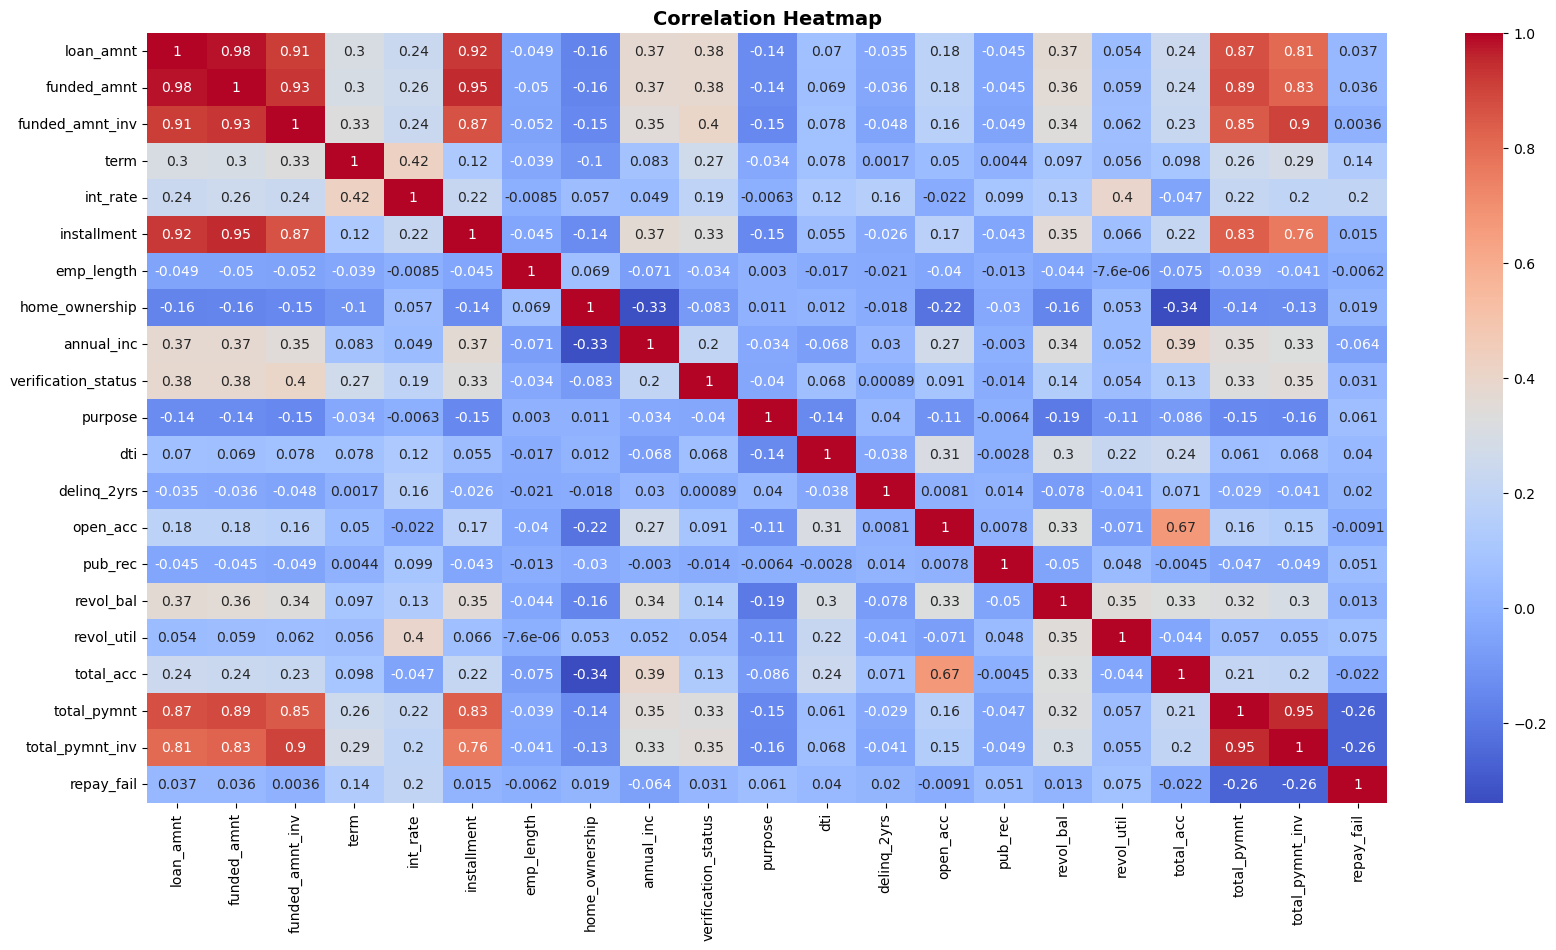

In [265]:
#Correlation heatmap

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate','installment','emp_length','home_ownership',
           'annual_inc','verification_status','purpose','dti','delinq_2yrs','open_acc','pub_rec','revol_bal',
          'revol_util','total_acc','total_pymnt','total_pymnt_inv','repay_fail']
sns.heatmap(loan_data[columns].corr(), annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap", fontsize = '14', fontweight= 'bold')
plt.savefig('corr.png', dpi=300)
plt.show()
#plt.matshow(data.corr())


In [266]:
loan_data = loan_data.drop(['funded_amnt'], axis=1)
loan_data = loan_data.drop(['funded_amnt_inv'], axis=1)
loan_data = loan_data.drop(['total_pymnt'], axis=1)
loan_data = loan_data.drop(['total_pymnt_inv'], axis=1)
loan_data = loan_data.drop(['installment'], axis=1)

In [267]:
loan_data = loan_data.dropna()

In [268]:
#Data Modeling

In [269]:
#Normalize data
from sklearn import preprocessing
d = preprocessing.normalize(loan_data)
scaled_df = pd.DataFrame(d, columns=loan_data.columns)
#print(scaled_df)

In [270]:
#Split the dataset into testing and training
X = loan_data.iloc[:,0:15]
Y = loan_data.iloc[:,-1]
X

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc
1,2500.0,36,13.98,4,4,20004.0,0,9.0,19.86,0.0,7.0,0.0,981.0,187,10.0
2,5000.0,36,15.95,4,4,59000.0,0,2.0,19.57,0.0,7.0,0.0,18773.0,1105,15.0
3,7000.0,36,9.91,1,0,53796.0,0,9.0,10.80,3.0,7.0,0.0,3269.0,500,20.0
4,2000.0,36,5.42,1,4,30000.0,0,2.0,3.60,0.0,7.0,0.0,0.0,0,15.0
7,6000.0,36,7.49,3,4,35000.0,0,2.0,13.13,0.0,5.0,0.0,5864.0,506,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,3000.0,36,11.99,3,4,74250.0,2,1.0,22.17,0.0,12.0,0.0,16550.0,812,22.0
38476,10400.0,36,13.49,9,4,62000.0,1,1.0,11.57,0.0,21.0,0.0,16898.0,409,33.0
38477,16000.0,60,14.96,1,0,95088.0,1,2.0,10.63,0.0,9.0,1.0,10386.0,681,25.0
38478,10000.0,36,16.89,0,4,48720.0,0,2.0,18.97,0.0,8.0,0.0,7301.0,577,12.0


In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [272]:
import time

In [273]:
#Create the model
from sklearn.ensemble import RandomForestClassifier

t0 = time.time()
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

t1 = time.time()

print('Time to create the model:',t1-t0)

Time to create the model: 7.373956680297852


In [274]:
y_pred = rfc.predict(X_test)

In [275]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix

print("Accuracy Score: ", accuracy_score(y_test, y_pred) * 100)
print("\n\nMean Squared Error: ", mean_squared_error(y_test, y_pred))
print("\n\nF1 Score: ", f1_score(y_test, y_pred))
print("\n\nClassification Report\n", classification_report(y_test, y_pred))
#print("\n\nConfusion Matrix\n", confusion_matrix(y_test, y_pred))

Accuracy Score:  84.80368780797966


Mean Squared Error:  0.15196312192020348


F1 Score:  0.014432989690721649


Classification Report
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      5342
           1       0.33      0.01      0.01       949

    accuracy                           0.85      6291
   macro avg       0.59      0.50      0.47      6291
weighted avg       0.77      0.85      0.78      6291



In [276]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Cross validation for Random Forest
clf = RandomForestClassifier()

# 10-Fold Cross validation
score = cross_val_score(clf, X_train, y_train, cv=10)
print("\n\nScore:\n", score)
print(f'Avg score:{"{:.4f}".format(score.mean())}')



Score:
 [0.8509539  0.85254372 0.85174881 0.85254372 0.85294118 0.85254372
 0.85015898 0.8509539  0.85135135 0.8509539 ]
Avg score:0.8517


In [277]:
# Get the feature importances
feature_importances = rfc.feature_importances_
# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print(importance_df)

                Feature  Importance
2              int_rate    0.125679
12            revol_bal    0.111929
13           revol_util    0.111753
8                   dti    0.110842
5            annual_inc    0.107532
0             loan_amnt    0.091789
14            total_acc    0.085371
10             open_acc    0.067938
3            emp_length    0.056872
7               purpose    0.045770
6   verification_status    0.024697
4        home_ownership    0.022117
1                  term    0.014810
9           delinq_2yrs    0.014379
11              pub_rec    0.008522


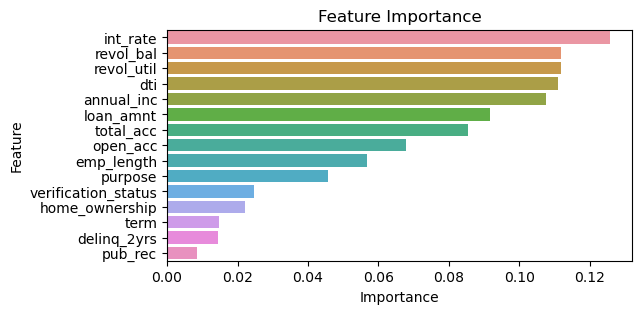

In [278]:
import seaborn as sns

# Plot the feature importances 
plt.figure(figsize=(6,3))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [279]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test)


In [280]:
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix

print("Accuracy Score: ", accuracy_score(y_test, y_pred_dtc) * 100)
print("\n\nMean Squared Error: ", mean_squared_error(y_test, y_pred_dtc))
print("\n\nF1 Score: ", f1_score(y_test, y_pred_dtc))
print("\n\nClassification Report\n", classification_report(y_test, y_pred_dtc))
#print("\n\nConfusion Matrix\n", confusion_matrix(y_test, y_pred_dtc))

Accuracy Score:  75.55237641074551


Mean Squared Error:  0.2444762358925449


F1 Score:  0.22323232323232323


Classification Report
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      5342
           1       0.21      0.23      0.22       949

    accuracy                           0.76      6291
   macro avg       0.54      0.54      0.54      6291
weighted avg       0.76      0.76      0.76      6291



Confusion Matrix
 [[4532  810]
 [ 728  221]]


In [281]:
# Cross validation
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Define the hyperparameters to search over
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}
# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()
# Use cross-validation to tune the hyperparameters
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [282]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_pred_gcv = model.predict(X_test)

In [283]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_gcv) * 100)
print("\n\nMean Squared Error: ", mean_squared_error(y_test, y_pred_gcv))
print("\n\nF1 Score: ", f1_score(y_test, y_pred_gcv))
print("\n\nClassification Report\n", classification_report(y_test, y_pred_gcv))
#print("\n\nConfusion Matrix\n", confusion_matrix(y_test, y_pred_gcv))

Accuracy Score:  84.91495787633127


Mean Squared Error:  0.15085042123668732


F1 Score:  0.0


Classification Report
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      5342
           1       0.00      0.00      0.00       949

    accuracy                           0.85      6291
   macro avg       0.42      0.50      0.46      6291
weighted avg       0.72      0.85      0.78      6291



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [284]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
lgr = LogisticRegression(random_state=16)

# fit the model with data
lgr.fit(X_train, y_train)

y_pred_lgr = lgr.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [285]:
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix

print("Accuracy Score: ", accuracy_score(y_test, y_pred_lgr) * 100)
print("\n\nMean Squared Error: ", mean_squared_error(y_test, y_pred_lgr))
print("\n\nF1 Score: ", f1_score(y_test, y_pred_lgr))
print("\n\nClassification Report\n", classification_report(y_test, y_pred_lgr))
#print("\n\nConfusion Matrix\n", confusion_matrix(y_test, y_pred_lgr))

Accuracy Score:  84.91495787633127


Mean Squared Error:  0.15085042123668732


F1 Score:  0.0


Classification Report
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      5342
           1       0.00      0.00      0.00       949

    accuracy                           0.85      6291
   macro avg       0.42      0.50      0.46      6291
weighted avg       0.72      0.85      0.78      6291



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [286]:
import numpy as np
from sklearn.model_selection import train_test_split

In [288]:
# Cross Validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

k = 10
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
result = cross_val_score(model , X, Y, cv = kf)
 
print("Avg accuracy: {}".format(result.mean()))

Avg accuracy: 0.8518008989131983
